# Online Retail Customer Churn Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_retail_customer_churn.csv')
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [5]:
df.Age.value_counts()

Age
21    30
23    26
54    26
18    24
53    24
68    24
69    23
25    22
48    22
37    22
41    22
38    22
30    22
45    21
64    21
63    21
27    21
36    20
61    20
47    20
42    20
59    20
24    20
34    20
52    19
51    19
56    19
28    19
66    19
44    19
46    19
58    18
33    18
67    18
26    18
50    18
43    18
57    17
19    17
55    17
35    17
31    16
20    16
22    16
29    15
39    15
62    14
60    14
65    14
40    13
32    13
49    12
Name: count, dtype: int64

### Customer Demographics Analysis

#### Distribution of customers by age group.

In [6]:
# df is my DataFrame containing the dataset
# Defining the age groups
age_bins = [0, 25, 40, 60, float('inf')]
age_labels = ['<25', '25-40', '40-60', '60+']

# Create a new column 'Age_Group' based on age bins
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows to verify the changes
print(df[['Age', 'Age_Group']].head())

   Age Age_Group
0   62       60+
1   65       60+
2   18       <25
3   21       <25
4   21       <25


In [7]:
#Counts of the customers using the Age group
age_group_counts = df['Age_Group'].value_counts()
age_group_counts 

Age_Group
40-60    383
25-40    280
60+      188
<25      149
Name: count, dtype: int64

Visualization of the Customers using Age Group

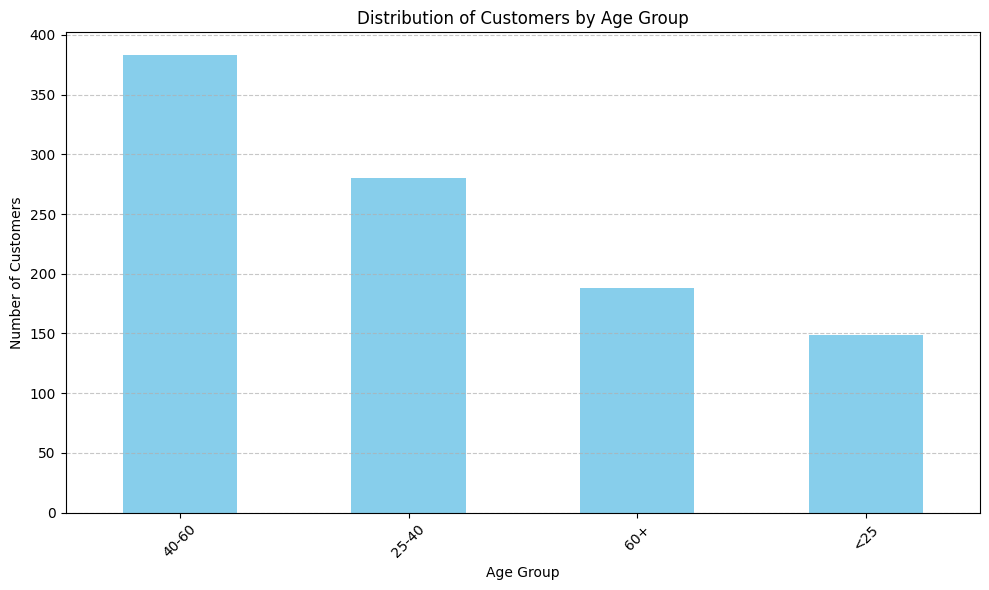

In [8]:
# Counting the number of customers in each age group
age_group_counts = df['Age_Group'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Gender distribution among customers.

In [9]:
#Counts of the Gender
df['Gender'].value_counts()

Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64

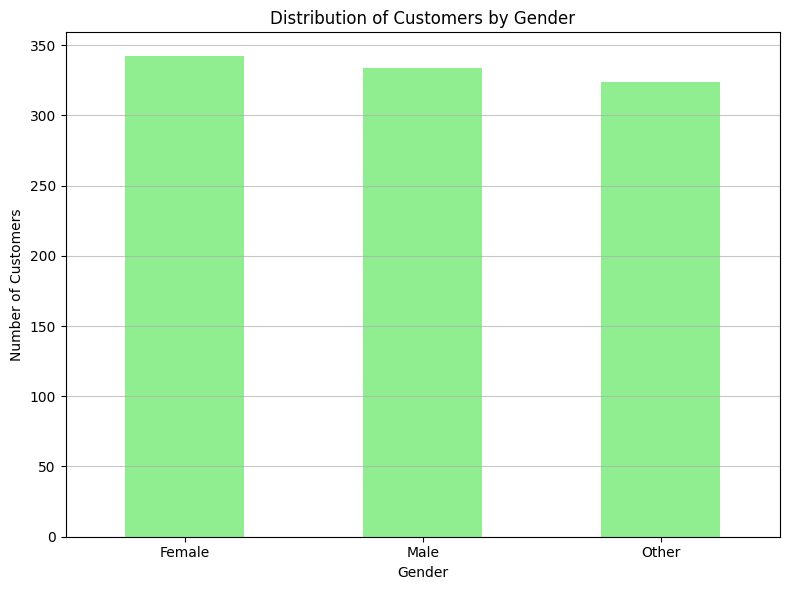

In [10]:
# Count the number of customers by gender
gender_counts = df['Gender'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

### Distribution of annual income among customers.

In [11]:
df['Annual_Income'].value_counts()

Annual_Income
94.60     3
153.19    2
40.69     2
130.66    2
92.08     2
         ..
180.22    1
139.31    1
172.17    1
160.05    1
134.86    1
Name: count, Length: 972, dtype: int64

In [12]:
#presence of some infinite values and i am going to be replacing them with NaN
# Replace infinite values with NaN
df['Annual_Income'] = df['Annual_Income'].replace([np.inf, -np.inf], np.nan)

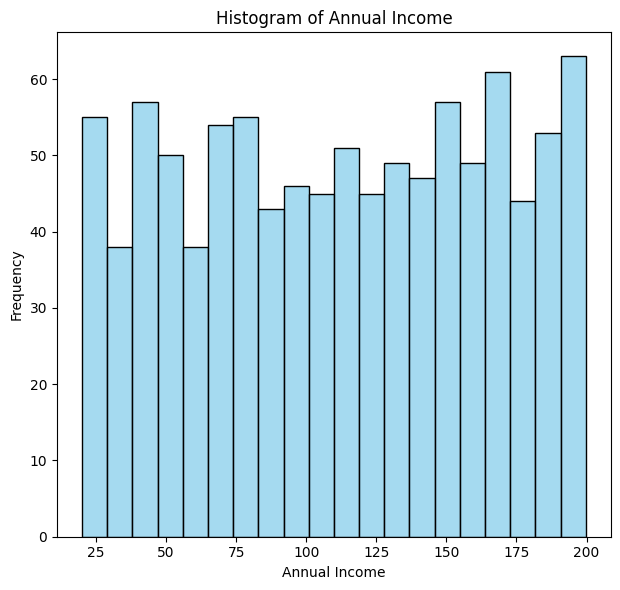

In [13]:
#This shows the distribution of the annual income 
plt.figure(figsize=(12, 6))

# Plot a histogram of the annual income
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Annual_Income', bins=20, kde=False, color='skyblue')
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

### The age and gender distribution of churned customers.

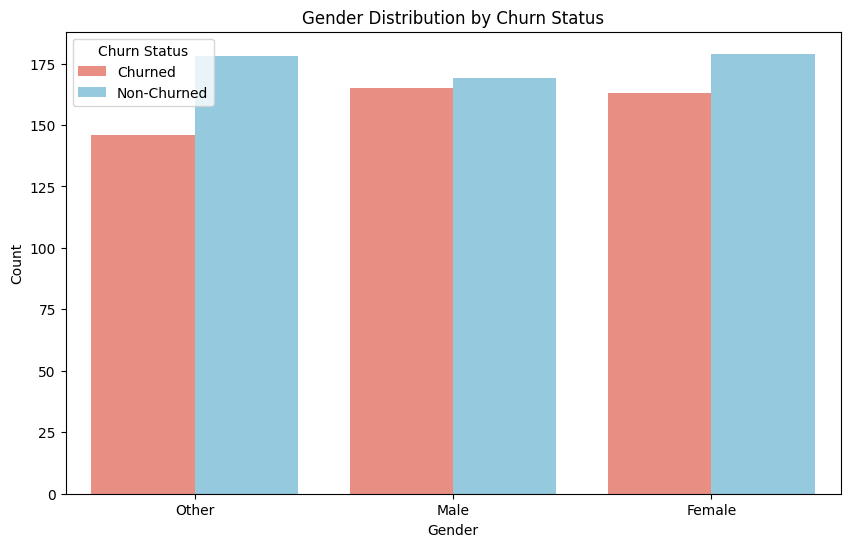

In [14]:
#Create a figure with subplots
plt.figure(figsize=(10, 6))

# Plotting the gender distribution by churn status
sns.countplot(data=df, x='Gender', hue='Target_Churn', palette={True: 'skyblue', False: 'salmon'})
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Churned', 'Non-Churned'])

# Show plot
plt.show()

In [15]:
# Replace infinite values with NaN in the 'Annual_Income' column
df['Annual_Income'] = df['Annual_Income'].replace([np.inf, -np.inf], np.nan)

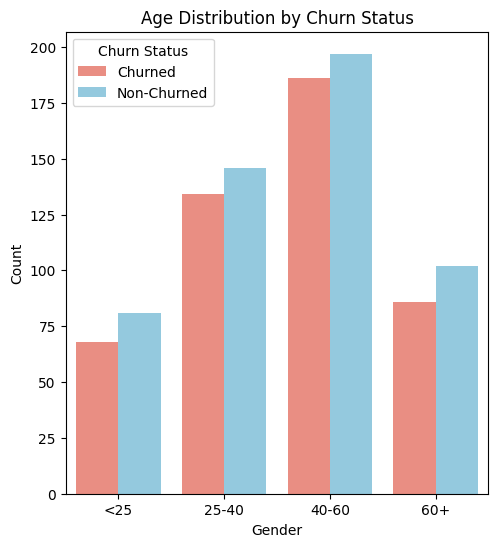

In [17]:
plt.figure(figsize=(12, 6))
# Plotting the age distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Age_Group', hue='Target_Churn', palette={True: 'skyblue', False: 'salmon'})
plt.title('Age Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Churned', 'Non-Churned'])
plt.show()

## Customer Behavior Analysis:

### Total spend distribution among customers.

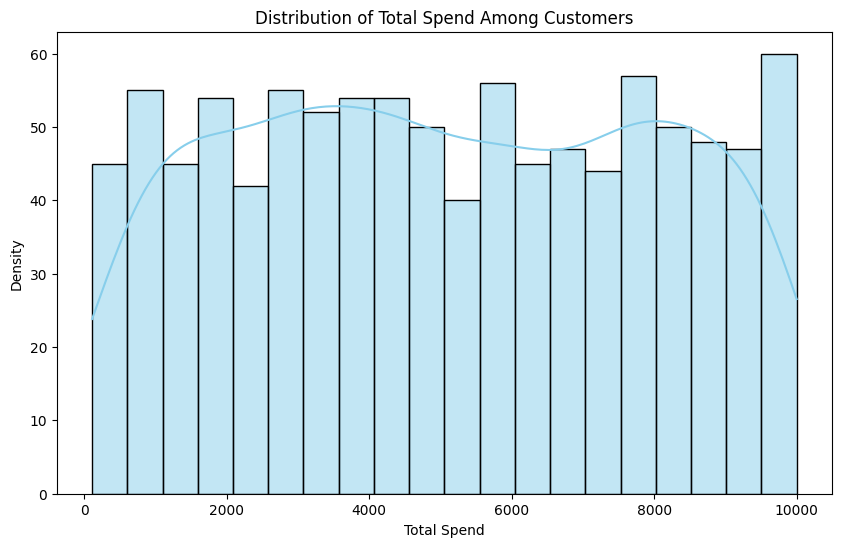

In [18]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plotting the distribution of total spend
sns.histplot(data=df, x='Total_Spend', bins=20, color='skyblue', kde=True)
plt.title('Distribution of Total Spend Among Customers')
plt.xlabel('Total Spend')
plt.ylabel('Density')

# Show plot
plt.show()

## Analysis of customer spending habits.

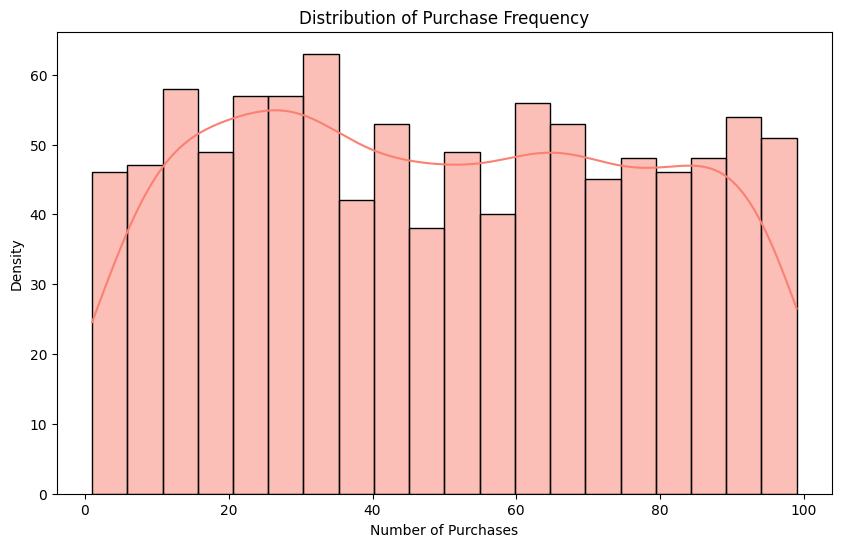

In [19]:
# Assuming 'Num_of_Purchases' is the column representing the number of purchases
plt.figure(figsize=(10, 6))
sns.histplot(df['Num_of_Purchases'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Customer_ID                 1000 non-null   int64   
 1   Age                         1000 non-null   int64   
 2   Gender                      1000 non-null   object  
 3   Annual_Income               1000 non-null   float64 
 4   Total_Spend                 1000 non-null   float64 
 5   Years_as_Customer           1000 non-null   int64   
 6   Num_of_Purchases            1000 non-null   int64   
 7   Average_Transaction_Amount  1000 non-null   float64 
 8   Num_of_Returns              1000 non-null   int64   
 9   Num_of_Support_Contacts     1000 non-null   int64   
 10  Satisfaction_Score          1000 non-null   int64   
 11  Last_Purchase_Days_Ago      1000 non-null   int64   
 12  Email_Opt_In                1000 non-null   bool    
 13  Promotion_Response 

Relationship between total spend and annual income

/var/folders/_z/6b364qnd6c7d5d8pwvmxh5w80000gn/T/ipykernel_12010/773400938.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Annual_Income', y='Total_Spend', palette=['blue', 'red'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


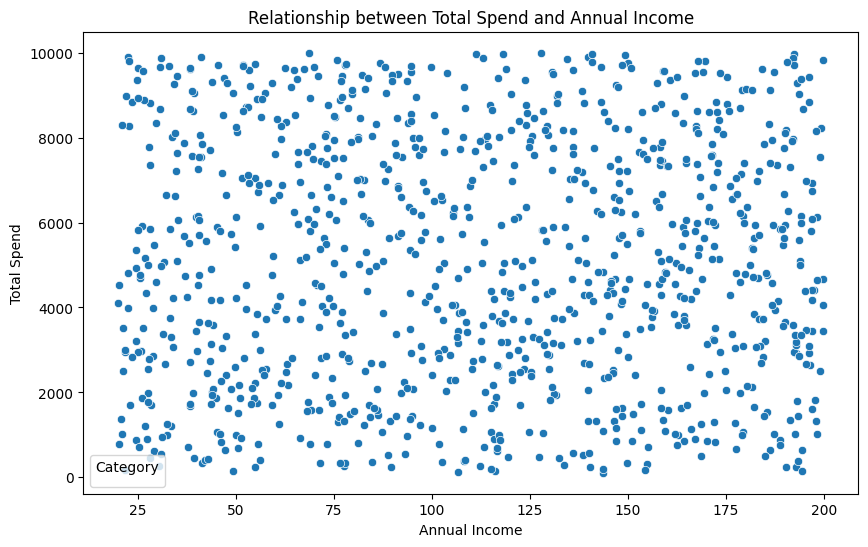

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Total_Spend', palette=['blue', 'red'])
plt.title('Relationship between Total Spend and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Total Spend')
plt.legend(title='Category')  # Add a legend
plt.show()

Correlation Coefficient: 0.017614713155934943


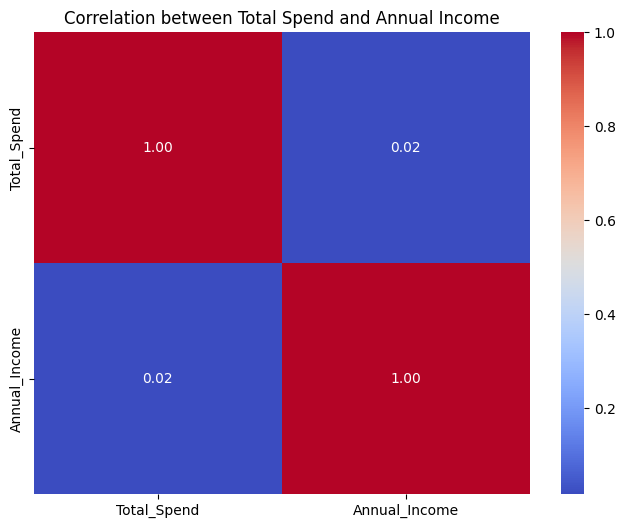

In [22]:
# Calculate correlation coefficient
correlation_coefficient = df['Total_Spend'].corr(df['Annual_Income'])
print("Correlation Coefficient:", correlation_coefficient)
# Calculate the correlation matrix
corr_matrix = df[['Total_Spend', 'Annual_Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Total Spend and Annual Income')
plt.show()

## Number of purchases made by each customer.

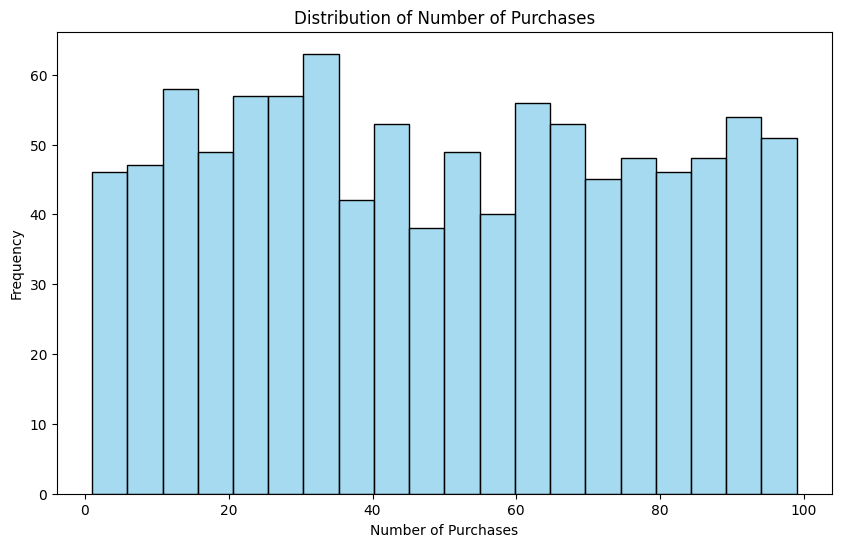

In [23]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plotting the distribution of number of purchases
sns.histplot(data=df, x='Num_of_Purchases', bins=20, color='skyblue', kde=False)
plt.title('Distribution of Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

# Show plot
plt.show()

#### Based on the histogram provided, it's evident that the number of purchases peaked at 60 within the range of 20-40 transactions. This suggests that a significant portion of customers made between 20 to 40 purchases, representing the highest frequency observed in the dataset.

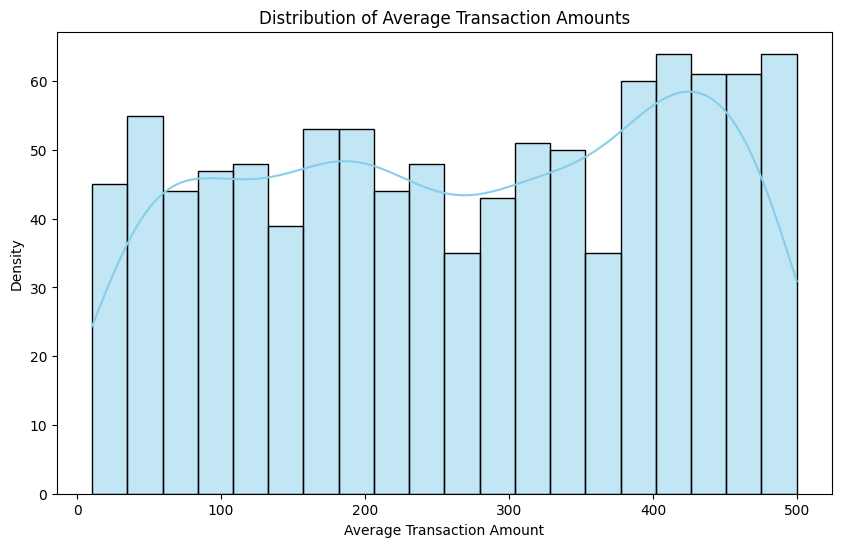

In [24]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plotting the distribution of average transaction amounts
sns.histplot(data=df, x='Average_Transaction_Amount', bins=20, color='skyblue', kde=True)
plt.title('Distribution of Average Transaction Amounts')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Density')
# Show plot
plt.show()

#### The data indicates that the average transaction amount reached its peak within the range of 400 to 500 units, showcasing a distinctive undulating pattern. This observation suggests that there is a tendency for transaction amounts to fluctuate within this particular range, rather than following a consistent or linear trend. Such fluctuations could be influenced by various factors such as seasonal trends, promotional activities, or changes in consumer behavior.

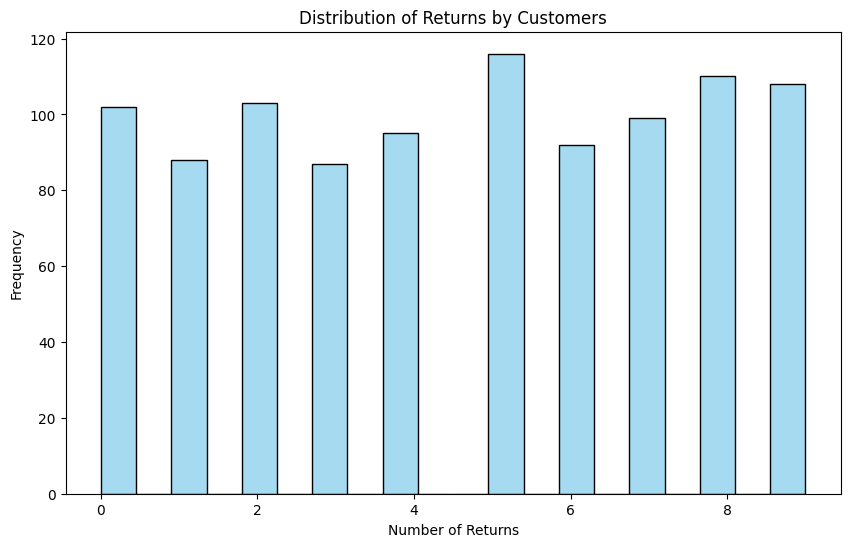

In [25]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plotting the distribution of returns
sns.histplot(data=df, x='Num_of_Returns', bins=20, color='skyblue', kde=False)
plt.title('Distribution of Returns by Customers')
plt.xlabel('Number of Returns')
plt.ylabel('Frequency')

# Show plot
plt.show()


### Customer Engagement and Support Analysis:

#### Number of years each customer has been with the store.

In [26]:
df.Years_as_Customer.value_counts()

Years_as_Customer
4     69
1     66
18    65
9     62
13    60
7     59
8     53
10    53
2     53
12    52
19    51
14    50
3     49
6     48
16    46
15    43
5     43
11    41
17    37
Name: count, dtype: int64

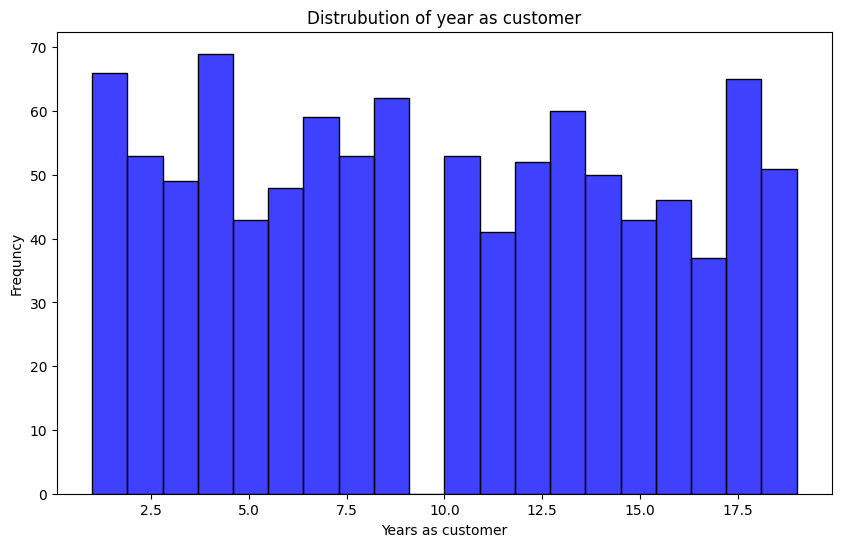

In [27]:
#create a figure
plt.figure(figsize = (10,6))

# plotting the distrubution of years as customer
sns.histplot(data=df, x='Years_as_Customer', bins=20, color='blue', kde=False)
plt.title('Distrubution of year as customer')
plt.xlabel('Years as customer')
plt.ylabel('Frequncy')

#show plot
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Customer_ID                 1000 non-null   int64   
 1   Age                         1000 non-null   int64   
 2   Gender                      1000 non-null   object  
 3   Annual_Income               1000 non-null   float64 
 4   Total_Spend                 1000 non-null   float64 
 5   Years_as_Customer           1000 non-null   int64   
 6   Num_of_Purchases            1000 non-null   int64   
 7   Average_Transaction_Amount  1000 non-null   float64 
 8   Num_of_Returns              1000 non-null   int64   
 9   Num_of_Support_Contacts     1000 non-null   int64   
 10  Satisfaction_Score          1000 non-null   int64   
 11  Last_Purchase_Days_Ago      1000 non-null   int64   
 12  Email_Opt_In                1000 non-null   bool    
 13  Promotion_Response 

In [29]:
df.Num_of_Support_Contacts.value_counts()

Num_of_Support_Contacts
1    222
0    203
2    200
3    188
4    187
Name: count, dtype: int64

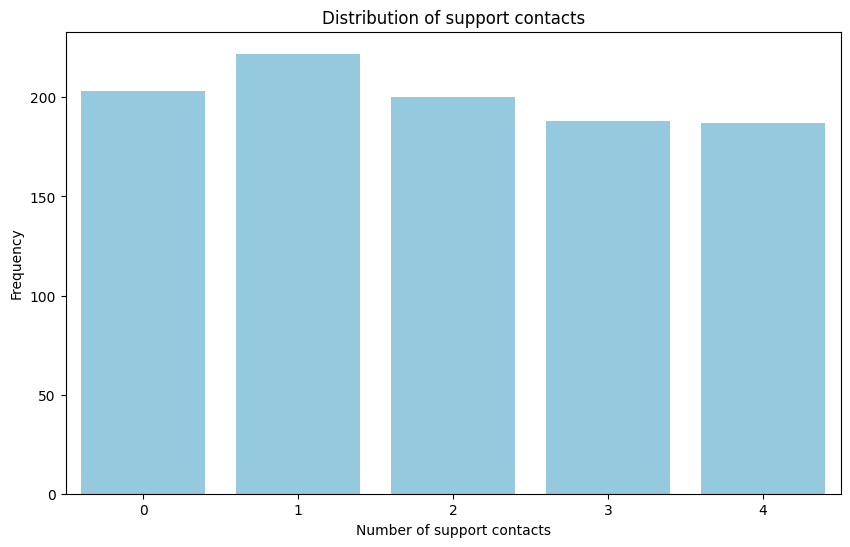

In [30]:
#create a figure
plt.figure(figsize=(10,6))

#ploting the distribution of support contacts using a bar plot
sns.countplot(data=df, x='Num_of_Support_Contacts', color='skyblue')
plt.title('Distribution of support contacts')
plt.xlabel('Number of support contacts')
plt.ylabel('Frequency')

plt.show()

#### The frequency of customer interactions with support services within the last year reveals valuable insights into customer satisfaction and the effectiveness of products or services offered. The data indicates that a significant portion of customers contacted support services only once. This pattern suggests that while some customers may encounter issues or require assistance, the majority of them do not face recurring problems or significant hurdles in using the product or service.

### Email opt-in rate among customers.

In [31]:
df.Email_Opt_In.value_counts()

Email_Opt_In
True     529
False    471
Name: count, dtype: int64

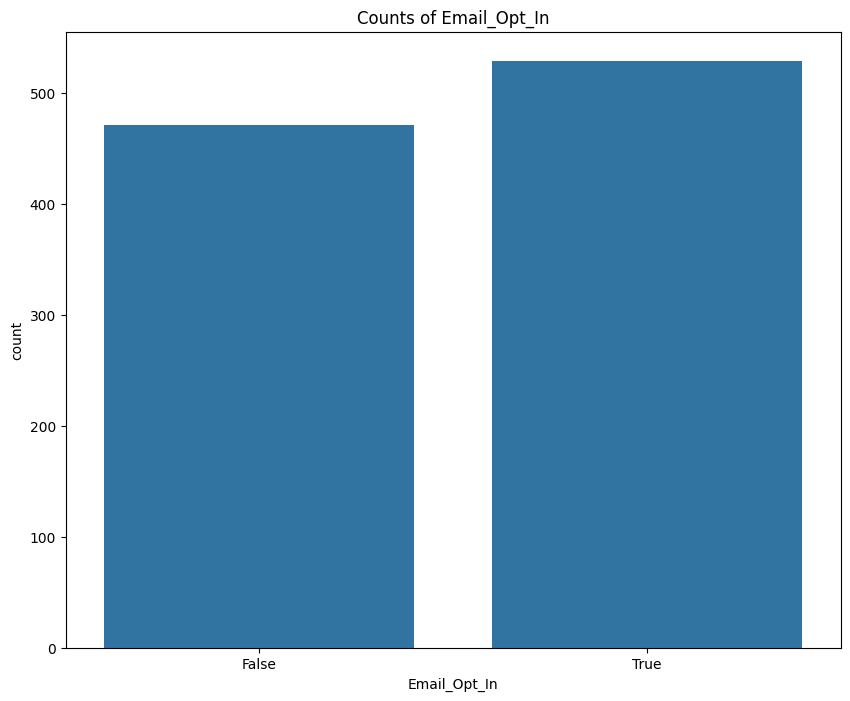

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='Email_Opt_In')
plt.title('Counts of Email_Opt_In')
plt.show()

#### Approximately 529 customers have opted in to receive emails, while 471 customers have declined, selecting false as their preference.

### Response to promotional campaigns.

In [33]:
#value count of the Promotion_Response
response_counts= df.Promotion_Response.value_counts()

response_counts

Promotion_Response
Unsubscribed    361
Responded       338
Ignored         301
Name: count, dtype: int64

/var/folders/_z/6b364qnd6c7d5d8pwvmxh5w80000gn/T/ipykernel_12010/867612685.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette='pastel')


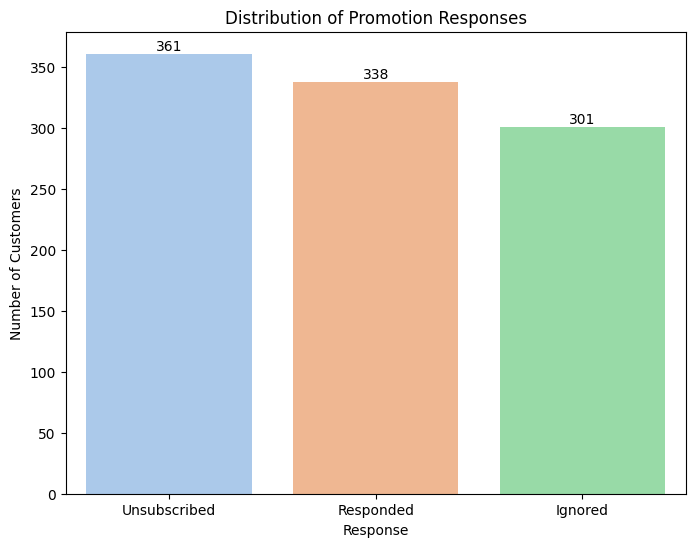

In [35]:
response_counts = df['Promotion_Response'].value_counts()
# Create a figure
plt.figure(figsize=(8, 6))

# Plotting the distribution of promotion responses using a bar plot
sns.barplot(x=response_counts.index, y=response_counts.values, palette='pastel')
plt.title('Distribution of Promotion Responses')
plt.xlabel('Response')
plt.ylabel('Number of Customers')

# Add annotations to show the count on top of each bar
for index, value in enumerate(response_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()

##### The outcomes of the promotion responses are as follows: 361 customers chose to unsubscribe, indicating a preference to discontinue receiving promotional materials. On the other hand, 338 customers responded positively to the promotion, showing interest in the offer or message conveyed. However, 301 customers chose to ignore the promotion entirely, neither responding positively nor opting out. Understanding these response outcomes is essential for refining promotional strategies, tailoring messages to better resonate with the target audience, and optimizing the overall effectiveness of marketing campaigns

## Customer Satisfaction and Churn Analysis

### Distribution of satisfaction scores among age groups and Gender

In [36]:
#Customer rating 
Satisfaction = df.Satisfaction_Score.value_counts() 
Satisfaction 

Satisfaction_Score
3    219
4    204
1    202
2    192
5    183
Name: count, dtype: int64

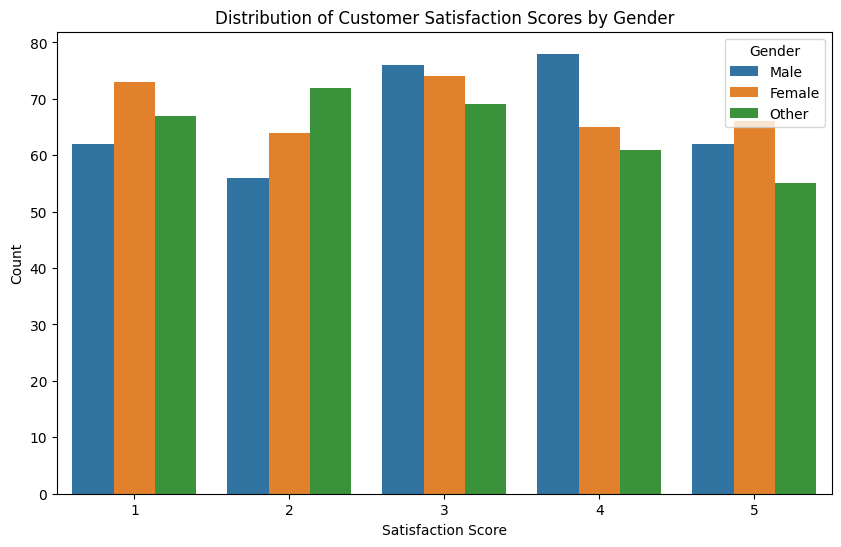

In [37]:
satisfaction = df['Satisfaction_Score'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Satisfaction_Score', hue='Gender')
plt.title('Distribution of Customer Satisfaction Scores by Gender')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()

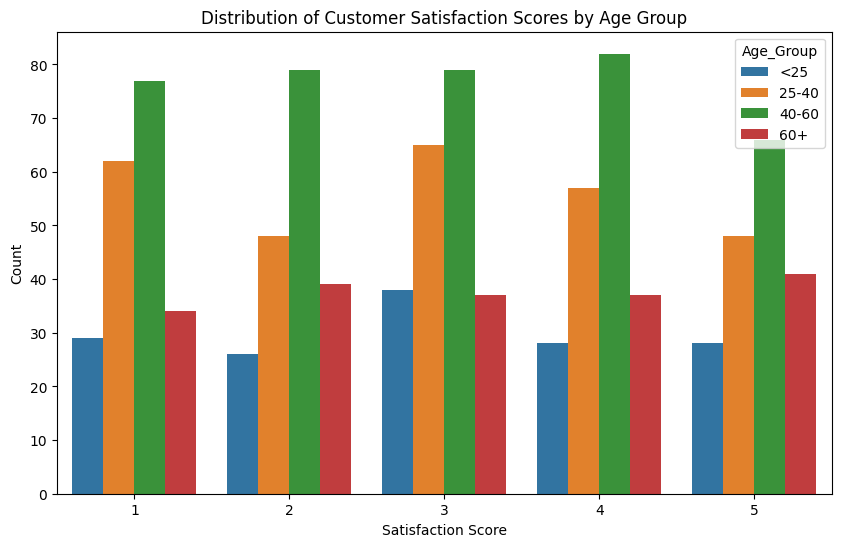

In [38]:
# Create a countplot to visualize the distribution of customer satisfaction scores with respect to age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Satisfaction_Score', hue='Age_Group')
plt.title('Distribution of Customer Satisfaction Scores by Age Group')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()

## Relationship between satisfaction score and churn rate.

/var/folders/_z/6b364qnd6c7d5d8pwvmxh5w80000gn/T/ipykernel_12010/2142771166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target_Churn', y='Satisfaction_Score', palette=['skyblue', 'salmon'])


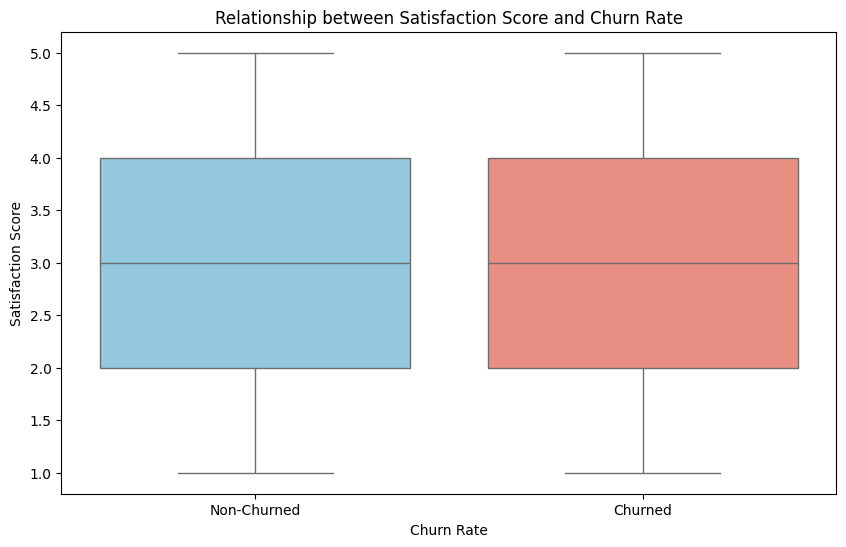

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Target_Churn', y='Satisfaction_Score', palette=['skyblue', 'salmon'])
plt.title('Relationship between Satisfaction Score and Churn Rate')
plt.xlabel('Churn Rate')
plt.ylabel('Satisfaction Score')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])  # Set x-axis labels
plt.show()

In [40]:
df.Target_Churn.value_counts()

Target_Churn
True     526
False    474
Name: count, dtype: int64

/var/folders/_z/6b364qnd6c7d5d8pwvmxh5w80000gn/T/ipykernel_12010/1099580651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target_Churn', palette='pastel')


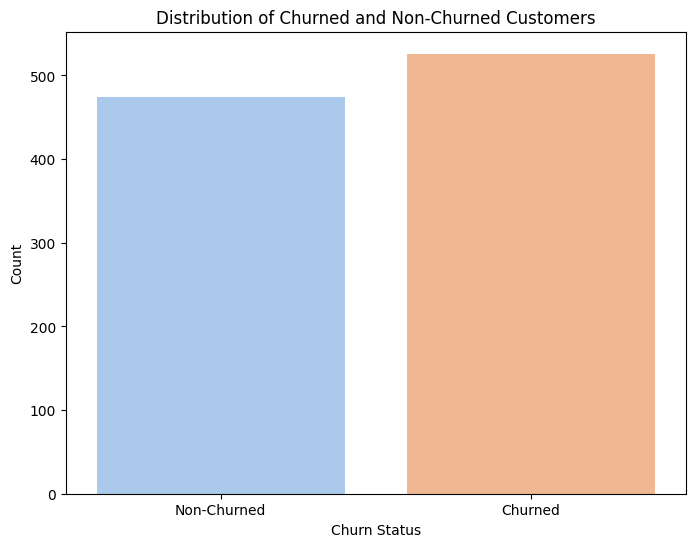

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Target_Churn', palette='pastel')
plt.title('Distribution of Churned and Non-Churned Customers')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])  # Set x-axis labels
plt.show()

##### The data indicates that the number of customers who churned from the service or product had the highest count, followed by those who remained non-churned. Understanding churn rates is vital for businesses to assess customer satisfaction, identify potential pain points, and implement retention strategies.

### Last purchase days ago distribution among customers.

In [42]:
df.Last_Purchase_Days_Ago.value_counts()

Last_Purchase_Days_Ago
338    9
82     8
130    8
126    8
323    8
      ..
179    1
208    1
153    1
279    1
184    1
Name: count, Length: 337, dtype: int64

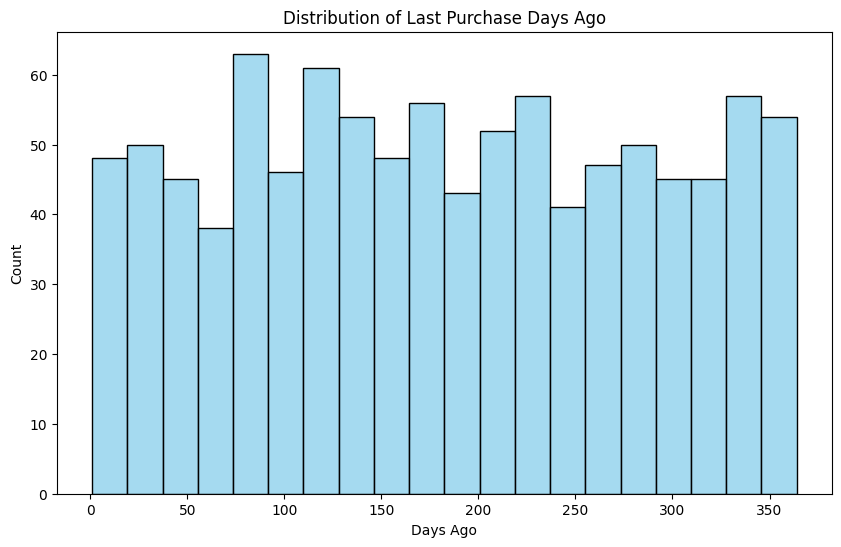

In [43]:
# Plotting the distribution of last purchase days ago using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Last_Purchase_Days_Ago', bins=20, color='skyblue', kde=False)
plt.title('Distribution of Last Purchase Days Ago')
plt.xlabel('Days Ago')
plt.ylabel('Count')

# Show plot
plt.show()

#### The data shows that approximately 9 customers made their last purchase approximately 338 days ago, indicating a relatively long lapse in their buying activity. Among them, 8 customers returned to make another purchase approximately 82 days ago, suggesting a potential re-engagement with the product or service after a period of dormancy.